In [223]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [224]:
df=pd.read_csv("Coffe_sales.csv")
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,3/1/2024,15:50.5
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,3/1/2024,19:22.5
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,3/1/2024,20:18.1
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,3/1/2024,46:33.0
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,3/1/2024,48:14.6


In [225]:
print(df.shape)
display(df.columns)

(3547, 11)


Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [227]:
df.isnull().sum()

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

In [228]:
df.duplicated().sum()

np.int64(0)

In [229]:
coffee_name=df['coffee_name'].value_counts()
coffee_name

coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Hot Chocolate          276
Cocoa                  239
Espresso               129
Name: count, dtype: int64

array(['Morning', 'Afternoon', 'Night'], dtype=object)

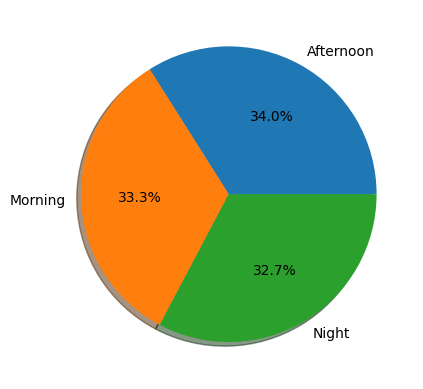

In [230]:
display(df['Time_of_Day'].unique())
count=df['Time_of_Day'].value_counts()
plt.pie(count, labels=count.index,autopct='%1.1f%%',shadow=True)
plt.show()

In [231]:
df['Date']=pd.to_datetime(df['Date'])
df['Time'] = df['Time'].astype(str).str.replace('.', ':', regex=False)
df['Time']=pd.to_datetime(df['Time'],errors='coerce',format='%H:%M:%S')
df['Time']=df['Time'].dt.time

In [232]:
df['Weekend_flag'] = df['Weekday'].apply(lambda x: 1 if x in ['Sat', 'Sun'] else 0)
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,Weekend_flag
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,15:50:05,0
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,19:22:05,0
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,20:18:01,0
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,NaT,0
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,NaT,0


In [233]:
week_flag=df['Weekend_flag'].value_counts()
display(week_flag)

Weekend_flag
0    2658
1     889
Name: count, dtype: int64

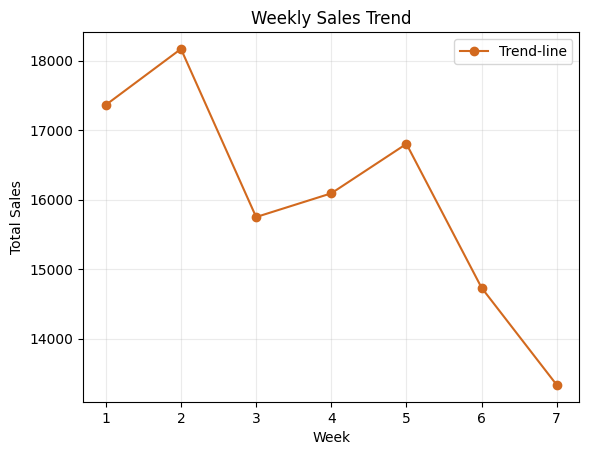

In [234]:
weekly_sales = df.groupby('Weekdaysort')['money'].sum()
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', color='chocolate',label='Trend-line')
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.grid(True,alpha=0.25)
plt.legend()
plt.show()

In [235]:
revenue = df.groupby(['Date', 'coffee_name'])['money'].sum().reset_index()
display(revenue)

,Date,coffee_name,money
0,2024-03-01,Americano,28.90
1,2024-03-01,Americano with Milk,135.20
2,2024-03-01,Cocoa,38.70
3,2024-03-01,Hot Chocolate,116.10
4,2024-03-01,Latte,77.40
...,...,...,...
1671,2025-03-22,Latte,35.76
1672,2025-03-23,Americano,25.96
1673,2025-03-23,Cappuccino,35.76
1674,2025-03-23,Cocoa,71.52


coffee_name
Latte                  26875.30
Americano with Milk    24751.12
Cappuccino             17439.14
Americano              14650.26
Hot Chocolate           9933.46
Name: money, dtype: float64


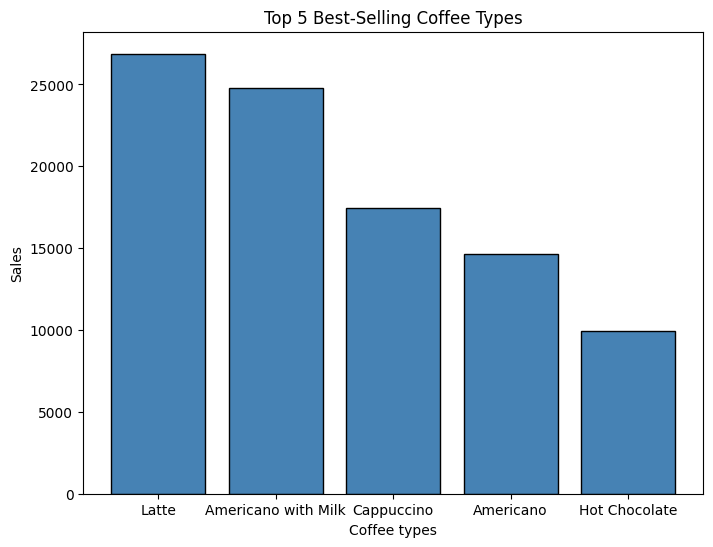

In [236]:
top_coffees = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False).head(5)
print(top_coffees)
plt.figure(figsize=(8,6))
plt.bar(top_coffees.index,top_coffees.values,color='steelblue',edgecolor='black')
plt.title("Top 5 Best-Selling Coffee Types")
plt.xlabel("Coffee types")
plt.ylabel("Sales")
plt.show()

Month_name
Jan     6398.86
Feb    13215.48
Mar    15891.64
Apr     5719.56
May     8164.42
Jun     7617.76
Jul     6915.94
Aug     7613.84
Sep     9988.64
Oct    13891.16
Nov     8590.54
Dec     8237.74
Name: money, dtype: float64

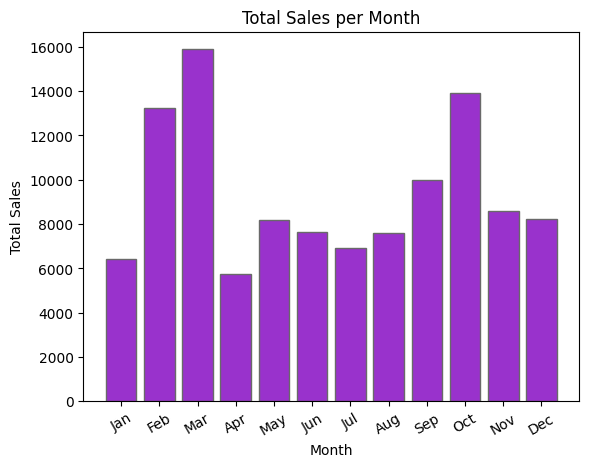

In [237]:
sales_month = df.groupby('Month_name')['money'].sum()
mon_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sales_month = sales_month.reindex(mon_order)
display(sales_month)
plt.bar(sales_month.index,sales_month.values,color='darkorchid',edgecolor='dimgray')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=30)
plt.show()

In [238]:
sales_change = sales_month.diff()
print(sales_change)

Month_name
Jan         NaN
Feb     6816.62
Mar     2676.16
Apr   -10172.08
May     2444.86
Jun     -546.66
Jul     -701.82
Aug      697.90
Sep     2374.80
Oct     3902.52
Nov    -5300.62
Dec     -352.80
Name: money, dtype: float64


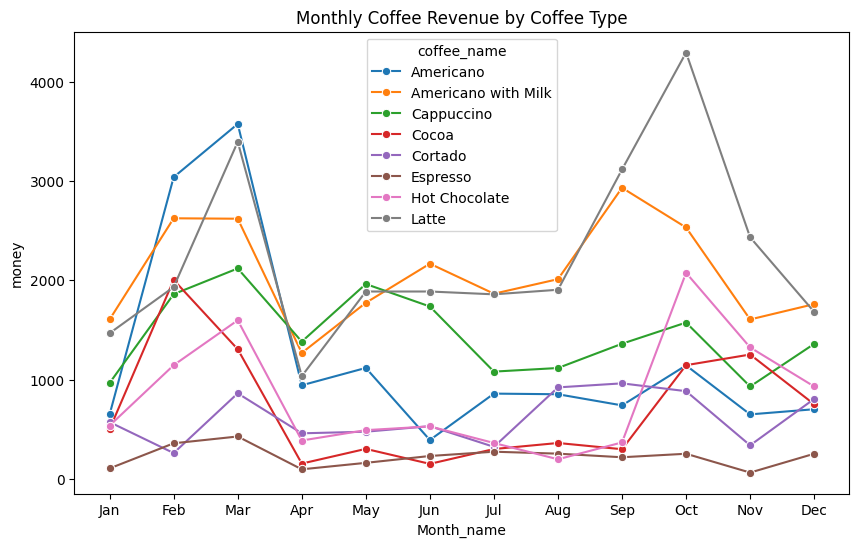

In [239]:
month_sales = df.groupby(['Month_name', 'coffee_name'])['money'].sum().reset_index()
month_sales['Month_name'] = pd.Categorical(month_sales['Month_name'], categories=mon_order, ordered=True)
plt.figure(figsize=(10,6))
sns.lineplot(x='Month_name', y='money', hue='coffee_name', data=month_sales, marker="o")
plt.title("Monthly Coffee Revenue by Coffee Type")
plt.show()

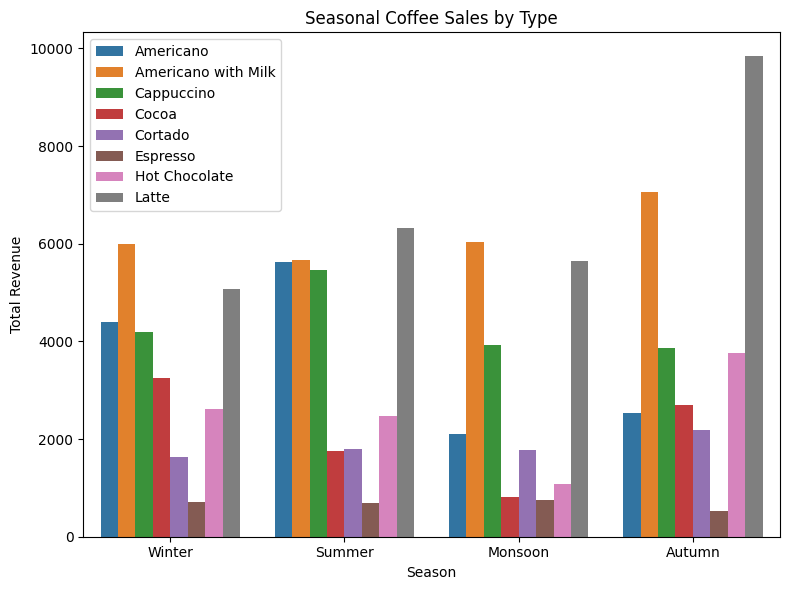

In [240]:
bins = [0, 2, 5, 8, 11, 12]
labels = ['Winter', 'Summer', 'Monsoon', 'Autumn', 'Winter']
df['Season'] = pd.cut(df['Monthsort'], bins=bins, labels=labels, right=True, include_lowest=True,ordered=False)
seasonal_sales = df.groupby(['Season', 'coffee_name'],observed=True)['money'].sum().reset_index()
seasonal_sales['Season'] = pd.Categorical(seasonal_sales['Season'], categories=['Winter', 'Summer', 'Monsoon', 'Autumn'], ordered=True)
plt.figure(figsize=(8,6))
sns.barplot(x='Season', y='money', hue='coffee_name', data=seasonal_sales)
plt.title("Seasonal Coffee Sales by Type")
plt.ylabel("Total Revenue")
plt.xlabel("Season")
plt.legend()
plt.tight_layout()
plt.show()

In [241]:
hourly_sales = df.groupby('hour_of_day')['money'].sum()
display(hourly_sales)
hourly_change=hourly_sales.diff()
display(hourly_change)

hour_of_day
6       149.40
7      2846.02
8      7017.88
9      7264.28
10    10198.52
11     8453.10
12     7419.62
13     7028.76
14     7173.80
15     7476.02
16     9031.84
17     7659.76
18     7162.60
19     7751.96
20     5578.92
21     6397.94
22     3635.16
Name: money, dtype: float64

hour_of_day
6         NaN
7     2696.62
8     4171.86
9      246.40
10    2934.24
11   -1745.42
12   -1033.48
13    -390.86
14     145.04
15     302.22
16    1555.82
17   -1372.08
18    -497.16
19     589.36
20   -2173.04
21     819.02
22   -2762.78
Name: money, dtype: float64

In [242]:
money_vec = df['money'].values
hour_vec = df['hour_of_day'].values
weekday_vec = df['Weekdaysort'].values
dot_money_hour = np.dot(money_vec, hour_vec)
dot_money_weekday = np.dot(money_vec, weekday_vec)
print("money·hour_of_day:", dot_money_hour)
print("money·weekdaysort:", dot_money_weekday)

money·hour_of_day: 1607140.28
money·weekdaysort: 431083.67999999964


In [243]:
df['money'].describe()

count    3547.000000
mean       31.645216
std         4.877754
min        18.120000
25%        27.920000
50%        32.820000
75%        35.760000
max        38.700000
Name: money, dtype: float64

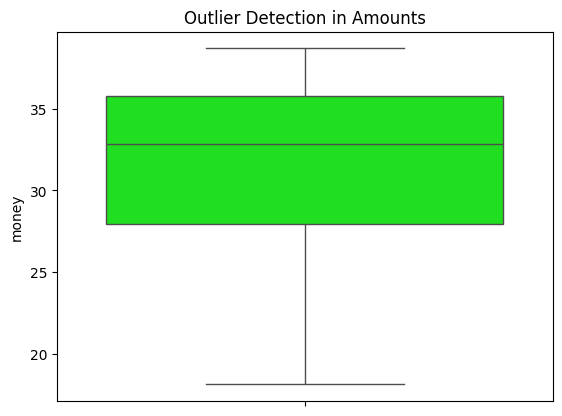

In [244]:
sns.boxplot(df['money'], color='lime')
plt.title('Outlier Detection in Amounts')
plt.show()

In [245]:
p_latte_mrng = ((df['coffee_name']=='Latte') & (df['Time_of_Day']=='Afternoon')).mean()
print("P(Latte and Morning) =", p_latte_mrng)

P(Latte and Morning) = 0.07612066535100084


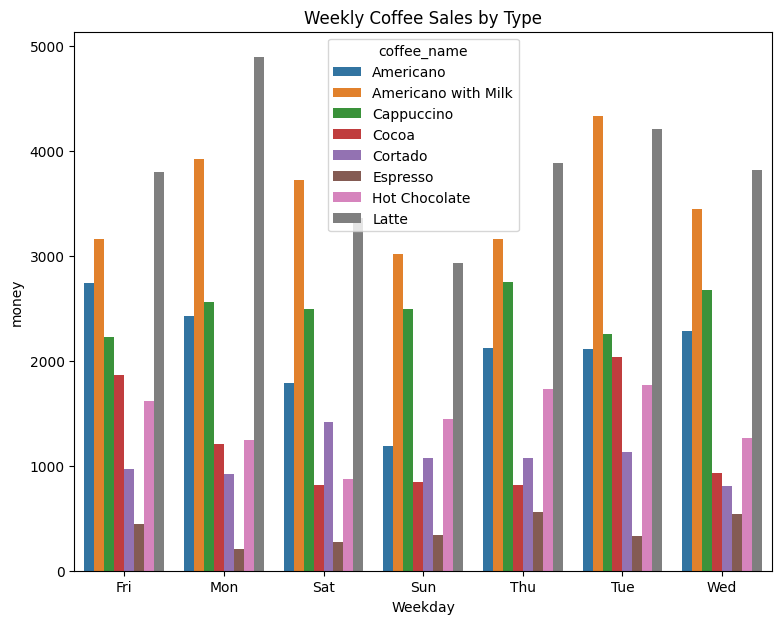

In [246]:
weekly_sales = df.groupby(['Weekday','coffee_name'])['money'].sum().reset_index()
plt.figure(figsize=(9,7))
sns.barplot(x='Weekday', y='money', hue='coffee_name', data=weekly_sales)
plt.title("Weekly Coffee Sales by Type")
plt.show()

In [247]:
df=pd.get_dummies(df,columns=['coffee_name'],drop_first=True)
df.head()

,hour_of_day,cash_type,money,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,Weekend_flag,Season,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte
0,10,card,38.7,Morning,Fri,Mar,5,3,2024-03-01,15:50:05,0,Summer,False,False,False,False,False,False,True
1,12,card,38.7,Afternoon,Fri,Mar,5,3,2024-03-01,19:22:05,0,Summer,False,False,False,False,False,True,False
2,12,card,38.7,Afternoon,Fri,Mar,5,3,2024-03-01,20:18:01,0,Summer,False,False,False,False,False,True,False
3,13,card,28.9,Afternoon,Fri,Mar,5,3,2024-03-01,NaT,0,Summer,False,False,False,False,False,False,False
4,13,card,38.7,Afternoon,Fri,Mar,5,3,2024-03-01,NaT,0,Summer,False,False,False,False,False,False,True


In [248]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Time_of_Day']=le.fit_transform(df['Time_of_Day'])
df.head()

,hour_of_day,cash_type,money,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,Weekend_flag,Season,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte
0,10,card,38.7,1,Fri,Mar,5,3,2024-03-01,15:50:05,0,Summer,False,False,False,False,False,False,True
1,12,card,38.7,0,Fri,Mar,5,3,2024-03-01,19:22:05,0,Summer,False,False,False,False,False,True,False
2,12,card,38.7,0,Fri,Mar,5,3,2024-03-01,20:18:01,0,Summer,False,False,False,False,False,True,False
3,13,card,28.9,0,Fri,Mar,5,3,2024-03-01,NaT,0,Summer,False,False,False,False,False,False,False
4,13,card,38.7,0,Fri,Mar,5,3,2024-03-01,NaT,0,Summer,False,False,False,False,False,False,True


0.12151343174393466


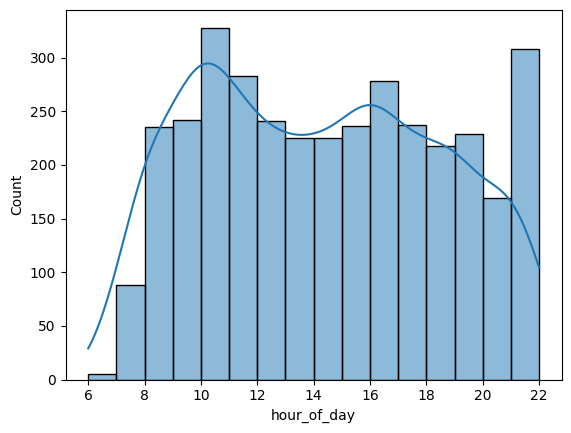

In [249]:
sns.histplot(x='hour_of_day',data=df,kde=True)
print(df['hour_of_day'].skew())

-0.544506596775559


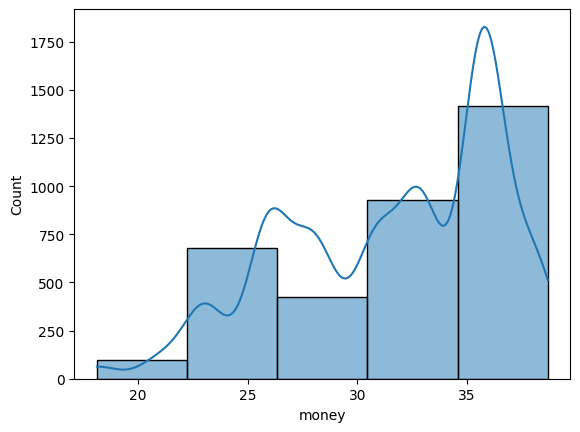

In [250]:
sns.histplot(x='money',data=df,kde=True,bins=5)
print(df['money'].skew())

In [251]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
df['money_pt'] = pt.fit_transform(df[['money']])
df.head()

,hour_of_day,cash_type,money,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,Weekend_flag,Season,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte,money_pt
0,10,card,38.7,1,Fri,Mar,5,3,2024-03-01,15:50:05,0,Summer,False,False,False,False,False,False,True,1.685728
1,12,card,38.7,0,Fri,Mar,5,3,2024-03-01,19:22:05,0,Summer,False,False,False,False,False,True,False,1.685728
2,12,card,38.7,0,Fri,Mar,5,3,2024-03-01,20:18:01,0,Summer,False,False,False,False,False,True,False,1.685728
3,13,card,28.9,0,Fri,Mar,5,3,2024-03-01,NaT,0,Summer,False,False,False,False,False,False,False,-0.682554
4,13,card,38.7,0,Fri,Mar,5,3,2024-03-01,NaT,0,Summer,False,False,False,False,False,False,True,1.685728


-0.17682749213199125


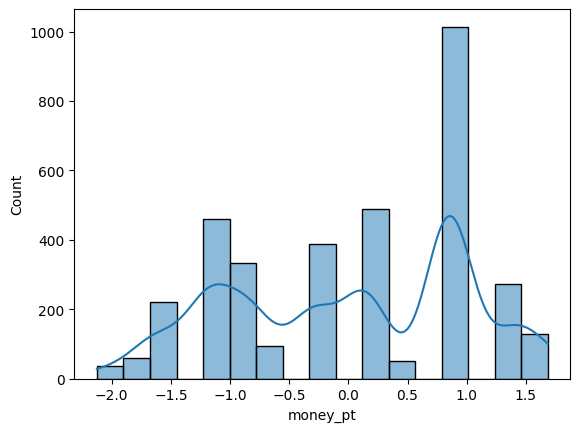

In [252]:
sns.histplot(x='money_pt',data=df,kde=True)
print(df['money_pt'].skew())

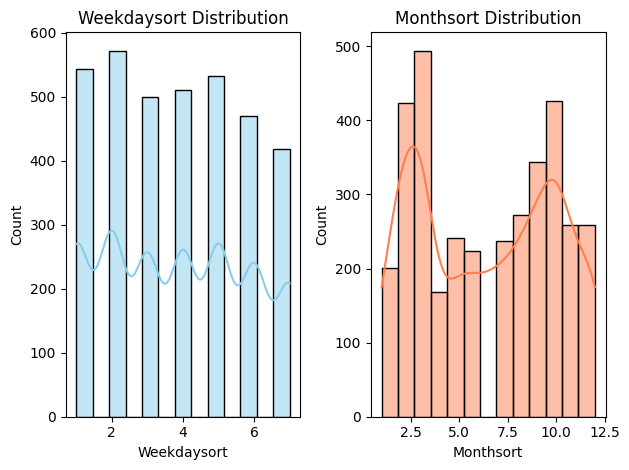

0.08213202439873915
0.004314391146298051


In [253]:
plt.subplot(1, 2, 1) 
sns.histplot(x='Weekdaysort', data=df, kde=True, color='skyblue')
plt.title('Weekdaysort Distribution')

plt.subplot(1, 2, 2) 
sns.histplot(x='Monthsort', data=df, kde=True, color='coral')
plt.title('Monthsort Distribution')
plt.tight_layout()
plt.show()

print(df['Weekdaysort'].skew())
print(df['Monthsort'].skew())

In [254]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df['Weekdaysort_norm'] = pt.fit_transform(df[['Weekdaysort']])
df.head()

,hour_of_day,cash_type,money,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,...,Season,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte,money_pt,Weekdaysort_norm
0,10,card,38.7,1,Fri,Mar,5,3,2024-03-01,15:50:05,...,Summer,False,False,False,False,False,False,True,1.685728,0.63026
1,12,card,38.7,0,Fri,Mar,5,3,2024-03-01,19:22:05,...,Summer,False,False,False,False,False,True,False,1.685728,0.63026
2,12,card,38.7,0,Fri,Mar,5,3,2024-03-01,20:18:01,...,Summer,False,False,False,False,False,True,False,1.685728,0.63026
3,13,card,28.9,0,Fri,Mar,5,3,2024-03-01,NaT,...,Summer,False,False,False,False,False,False,False,-0.682554,0.63026
4,13,card,38.7,0,Fri,Mar,5,3,2024-03-01,NaT,...,Summer,False,False,False,False,False,False,True,1.685728,0.63026


-0.11574928970980812


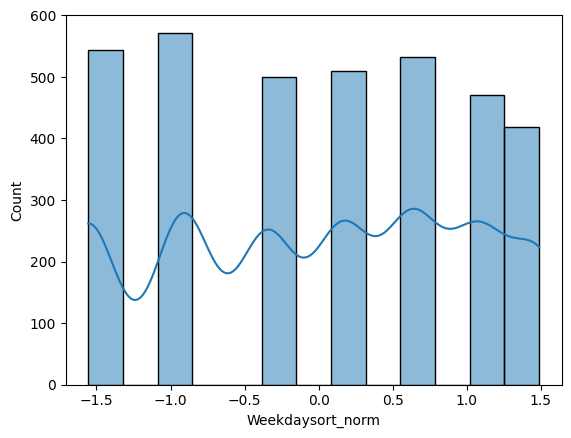

In [255]:
sns.histplot(x='Weekdaysort_norm',data=df,kde=True)
print(df['Weekdaysort_norm'].skew())

In [256]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df['Monthsort_norm'] = pt.fit_transform(df[['Monthsort']])
df.head()

,hour_of_day,cash_type,money,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,...,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte,money_pt,Weekdaysort_norm,Monthsort_norm
0,10,card,38.7,1,Fri,Mar,5,3,2024-03-01,15:50:05,...,False,False,False,False,False,False,True,1.685728,0.63026,-0.96341
1,12,card,38.7,0,Fri,Mar,5,3,2024-03-01,19:22:05,...,False,False,False,False,False,True,False,1.685728,0.63026,-0.96341
2,12,card,38.7,0,Fri,Mar,5,3,2024-03-01,20:18:01,...,False,False,False,False,False,True,False,1.685728,0.63026,-0.96341
3,13,card,28.9,0,Fri,Mar,5,3,2024-03-01,NaT,...,False,False,False,False,False,False,False,-0.682554,0.63026,-0.96341
4,13,card,38.7,0,Fri,Mar,5,3,2024-03-01,NaT,...,False,False,False,False,False,False,True,1.685728,0.63026,-0.96341


-0.16840635068647702


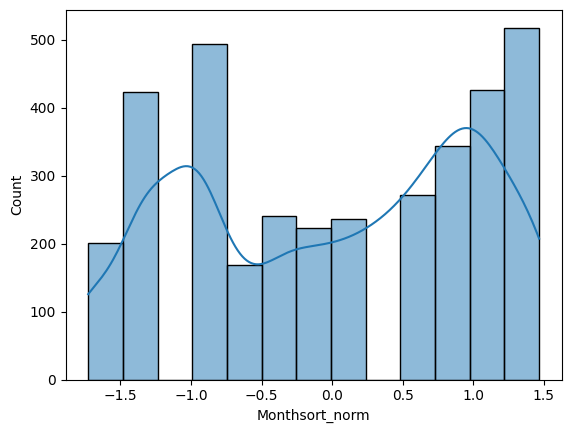

In [257]:
sns.histplot(x='Monthsort_norm',data=df,kde=True)
print(df['Monthsort_norm'].skew())

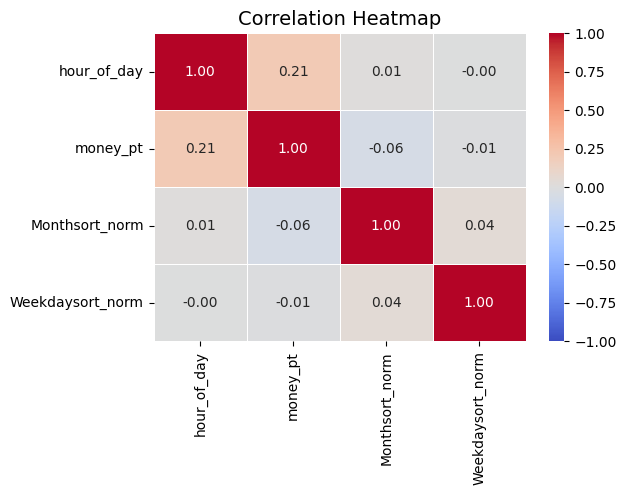

In [258]:
cols = ['hour_of_day', 'money_pt', 'Monthsort_norm', 'Weekdaysort_norm']
corr_subset = df[cols].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()